In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import tmap as tm
import numpy as np
from matplotlib import pyplot as plt

In [29]:
ethanol = ".".join(["CCCCCC"] * 1)

mol = Chem.MolFromSmiles(ethanol)
mol = AllChem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())

0

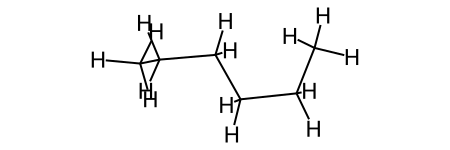

In [30]:
mol

In [31]:
enc = tm.Minhash()
lf = tm.LSHForest()
conf = mol.GetConformer()
atoms_coordinates = []
for i in range(mol.GetNumAtoms()):
    pos = conf.GetAtomPosition(i)
    atoms_coordinates.append(tm.VectorFloat([pos.x, pos.y, pos.z]))
lf.batch_add(enc.batch_from_weight_array(atoms_coordinates))
lf.index()

CFG = tm.LayoutConfiguration()
CFG.node_size = 2
CFG.mmm_repeats = 2
CFG.sl_repeats = 2
CFG.sl_scaling_type = tm.RelativeToAvgLength
x, y, s, t, _ = tm.layout_from_lsh_forest(lf, CFG)

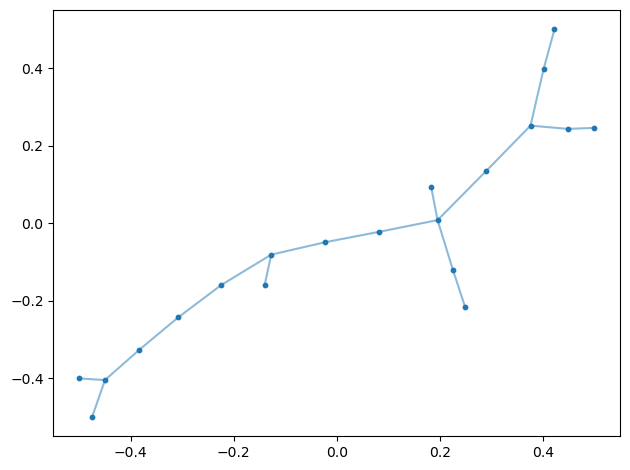

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(s)):
    ax.plot(
        [x[s[i]], x[t[i]]],
        [y[s[i]], y[t[i]]],
        alpha=0.5,
        zorder=1,
        color="tab:blue"
    )

ax.scatter(x, y, zorder=2, s=10, color="tab:blue")

plt.tight_layout()